In [14]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection

In [15]:
folderset = [folder for folder in glob.glob("Test/" + "**/", recursive=True)]
data = []
Y = []
largo = len(folderset)
for i in range(largo):
    fruta = folderset[i]
    imagenes = glob.glob("{}/*.jpg".format(fruta))
    print(str(i) +' Fruta')
    for imagen in imagenes:
        aqui = plt.imread(imagen).flatten()
        data.append(np.array(aqui))
        Y.append(i)
        
data = np.array(data)
print(np.shape(data),np.shape(Y))

0 Fruta
1 Fruta
2 Fruta
3 Fruta
4 Fruta
5 Fruta
6 Fruta
7 Fruta
8 Fruta
9 Fruta
10 Fruta
11 Fruta
12 Fruta
13 Fruta
(2143, 30000) (2143,)


In [16]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(data, Y, test_size=0.5)
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
loss=[]
F1 = []

In [ ]:
for i in range(20):
    n = i+1
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(n,),max_iter=200)
    mlp.fit(X_train, Y_train)
    loss.append(mlp.loss_)
    F1.append(sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro'))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
x = np.linspace(0,20)
plt.plot(x,loss)
plt.plot(x,F1)


Loss 2.558106046906551
F1 0.01641025641025641


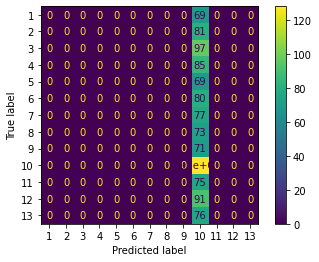

In [6]:
mlp_bueno = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),max_iter=200)
mlp_bueno.fit(X_train, Y_train)

print(np.shape(mlp.coefs_[i]))
for i in range(len(mlp.coefs_[0])):
    plt.imshow(mlp.coefs_[0][:,i].reshape(100,100,3),cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)